In [1]:
import rasterio as rio
import numpy as np
import pandas as pd
from rasterio.enums import Resampling

# --- Rutas individuales ---
ruta_inventario = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif"
ruta_pendiente  = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif"
ruta_aspecto    = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Aspect_Fill_1.tif"
ruta_elevacion  = r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\DEM.tif'
ruta_curvatura  = r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Curva_hor.tif'

# --- Raster base (inventario) ---
r_inventario = rio.open(ruta_inventario)
inventario = r_inventario.read(1)

height, width = r_inventario.height, r_inventario.width

def leer_y_resamplear(ruta, shape, ref):
    with rio.open(ruta) as src:
        return src.read(
            1,
            out_shape=(1, shape[0], shape[1]),
            resampling=Resampling.nearest
        )

# Resamplear al shape del inventario
pendiente  = leer_y_resamplear(ruta_pendiente, (height, width), r_inventario)
aspecto    = leer_y_resamplear(ruta_aspecto, (height, width), r_inventario)
elevacion  = leer_y_resamplear(ruta_elevacion, (height, width), r_inventario)
curvatura  = leer_y_resamplear(ruta_curvatura, (height, width), r_inventario)

# --- Reemplazar valores inválidos ---
pendiente  = np.where(pendiente < -100, np.nan, pendiente)
aspecto    = np.where(aspecto < -100, np.nan, aspecto)
elevacion  = np.where(elevacion < -100, np.nan, elevacion)
curvatura  = np.where(curvatura < -100, np.nan, curvatura)

# --- Crear máscara válida común ---
mascara_valida = (
    ~np.isnan(inventario) &
    ~np.isnan(pendiente) &
    ~np.isnan(aspecto) &
    ~np.isnan(elevacion) &
    ~np.isnan(curvatura)
)

# --- Aplicar máscara ---
inventario_vector = inventario[mascara_valida]
pendiente_vector  = pendiente[mascara_valida]
aspecto_vector    = aspecto[mascara_valida]
elevacion_vector  = elevacion[mascara_valida]
curvatura_vector  = curvatura[mascara_valida]

# --- Crear DataFrame ---
df = pd.DataFrame({
    'inventario': inventario_vector,
    'pendiente': pendiente_vector,
    'aspecto': aspecto_vector,
    'elevacion': elevacion_vector,
    'curvatura': curvatura_vector
})

# --- Resultado ---
print(df.shape)
print(list(df.columns))
print(df)  # 👈 Aquí se imprime el contenido completo del DataFrame


(43381, 5)
['inventario', 'pendiente', 'aspecto', 'elevacion', 'curvatura']
       inventario  pendiente     aspecto  elevacion     curvatura
0               0   0.000000    0.000000     1320.0 -0.000000e+00
1               0  12.360396  116.175293     1319.0  6.841379e-01
2               0   0.000000    0.000000     1289.0  3.840000e-01
3               0  23.396502  236.309937     1300.0  9.846154e-01
4               0  20.674463  212.005386     1312.0  4.602247e-01
...           ...        ...         ...        ...           ...
43376           0   0.000000    0.000000     1821.0  4.800000e-01
43377           0   0.000000    0.000000     1844.0 -1.058791e-16
43378           0  18.883389   37.874985     1840.0  1.859459e-01
43379           0  22.406872   22.833654     1831.0 -1.324138e+00
43380           0  22.130608   22.150238     1828.0 -3.200000e-02

[43381 rows x 5 columns]


In [2]:
import rasterio as rio
import numpy as np
import pandas as pd
from rasterio.enums import Resampling

# --- Rutas individuales ---
ruta_inventario = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif"
ruta_pendiente  = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif"
ruta_aspecto    = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Aspect_Fill_1.tif"
ruta_elevacion  = r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\DEM.tif'


# --- Raster base (inventario) ---
r_inventario = rio.open(ruta_inventario)
inventario = r_inventario.read(1)

height, width = r_inventario.height, r_inventario.width

def leer_y_resamplear(ruta, shape, ref):
    with rio.open(ruta) as src:
        return src.read(
            1,
            out_shape=(1, shape[0], shape[1]),
            resampling=Resampling.nearest
        )

# Resamplear al shape del inventario
pendiente  = leer_y_resamplear(ruta_pendiente, (height, width), r_inventario)
aspecto    = leer_y_resamplear(ruta_aspecto, (height, width), r_inventario)
elevacion  = leer_y_resamplear(ruta_elevacion, (height, width), r_inventario)
curvatura  = leer_y_resamplear(ruta_curvatura, (height, width), r_inventario)

# --- Reemplazar valores inválidos ---
pendiente  = np.where(pendiente < -100, np.nan, pendiente)
aspecto    = np.where(aspecto < -100, np.nan, aspecto)
elevacion  = np.where(elevacion < -100, np.nan, elevacion)
curvatura  = np.where(curvatura < -100, np.nan, curvatura)

# --- Crear máscara válida común ---
mascara_valida = (
    ~np.isnan(inventario) &
    ~np.isnan(pendiente) &
    ~np.isnan(aspecto) &
    ~np.isnan(elevacion) &
    ~np.isnan(curvatura)
)

# --- Aplicar máscara ---
inventario_vector = inventario[mascara_valida]
pendiente_vector  = pendiente[mascara_valida]
aspecto_vector    = aspecto[mascara_valida]
elevacion_vector  = elevacion[mascara_valida]
curvatura_vector  = curvatura[mascara_valida]

# --- Crear DataFrame ---
df = pd.DataFrame({
    'inventario': inventario_vector,
    'pendiente': pendiente_vector,
    'aspecto': aspecto_vector,
    'elevacion': elevacion_vector,
    'curvatura': curvatura_vector
})

# --- Resultado ---
print(df.shape)
print(list(df.columns))
print(df)  # 👈 Aquí se imprime el contenido completo del DataFrame


(43381, 5)
['inventario', 'pendiente', 'aspecto', 'elevacion', 'curvatura']
       inventario  pendiente     aspecto  elevacion     curvatura
0               0   0.000000    0.000000     1320.0 -0.000000e+00
1               0  12.360396  116.175293     1319.0  6.841379e-01
2               0   0.000000    0.000000     1289.0  3.840000e-01
3               0  23.396502  236.309937     1300.0  9.846154e-01
4               0  20.674463  212.005386     1312.0  4.602247e-01
...           ...        ...         ...        ...           ...
43376           0   0.000000    0.000000     1821.0  4.800000e-01
43377           0   0.000000    0.000000     1844.0 -1.058791e-16
43378           0  18.883389   37.874985     1840.0  1.859459e-01
43379           0  22.406872   22.833654     1831.0 -1.324138e+00
43380           0  22.130608   22.150238     1828.0 -3.200000e-02

[43381 rows x 5 columns]


In [3]:
from pandas import DataFrame
d={'inventario':inventario_vector,'pendiente':pendiente_vector,'aspecto':aspecto_vector, 'elevacion':elevacion_vector, 'curvatura':curvatura_vector}
df2 = pd.DataFrame(d)
X=df2.drop("inventario", axis=1)
y=df2['inventario']
X.head()

,pendiente,aspecto,elevacion,curvatura
0,0.000000,0.000000,1320.0,-0.000000
1,12.360396,116.175293,1319.0,0.684138
2,0.000000,0.000000,1289.0,0.384000
3,23.396502,236.309937,1300.0,0.984615
4,20.674463,212.005386,1312.0,0.460225


In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')

In [5]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (34704, 4)
Tamaño de labels de entrenamiento: (34704,)
Tamaño de variables de validación: (8677, 4)
Tamaño de labels de validación: (8677,)


In [6]:
result=model.fit(x_train,y_train)

In [7]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [8]:
y_val_pred=result.predict(x_test) 
y_val_probs=result.predict_proba(x_test)[:,1]

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[33555,     6],
       [    2,  1141]], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[33555,     6],
       [    2,  1141]], dtype=int64)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33561
           1       0.99      1.00      1.00      1143

    accuracy                           1.00     34704
   macro avg       1.00      1.00      1.00     34704
weighted avg       1.00      1.00      1.00     34704



In [11]:
y_val_probs = model.predict_proba(x_test)[:, 1]


In [12]:
#from sklearn.metrics import roc_curve, auc

#fpr, tpr, thresholds = roc_curve(y_train, y_train_probs, pos_label=1)  # Ajusta si tu clase positiva no es 1
#roc_auc_val = auc(fpr_val, tpr_val)

In [13]:
import numpy as np
print("Valores únicos en y_test:", np.unique(y_test, return_counts=True))

Valores únicos en y_test: (array([0, 1], dtype=uint8), array([8379,  298], dtype=int64))


In [14]:
print("Longitud de y_test:", len(y_test))
print("Longitud de y_val_probs:", len(y_val_probs))

Longitud de y_test: 8677
Longitud de y_val_probs: 8677


In [15]:
print("Valores mínimos y máximos en y_val_probs:", np.min(y_val_probs), np.max(y_val_probs))
print("Primeros 10 valores:", y_val_probs[:10])

Valores mínimos y máximos en y_val_probs: 0.0 0.55
Primeros 10 valores: [0.02 0.09 0.   0.   0.02 0.12 0.02 0.   0.01 0.  ]


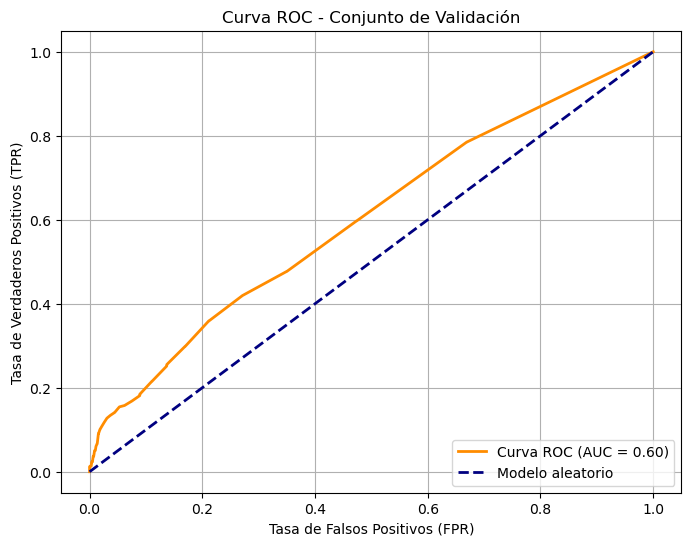

In [16]:
from sklearn.metrics import roc_curve, auc

# Asegurar que y_test y y_val_probs sean del tipo adecuado
y_test_clean = np.array(y_test).astype(int)
y_val_probs_clean = np.array(y_val_probs).astype(float)

# Calcular la curva ROC
fpr_val, tpr_val, thresholds = roc_curve(y_test_clean, y_val_probs_clean, pos_label=1)
roc_auc_val = auc(fpr_val, tpr_val)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Conjunto de Validación')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()



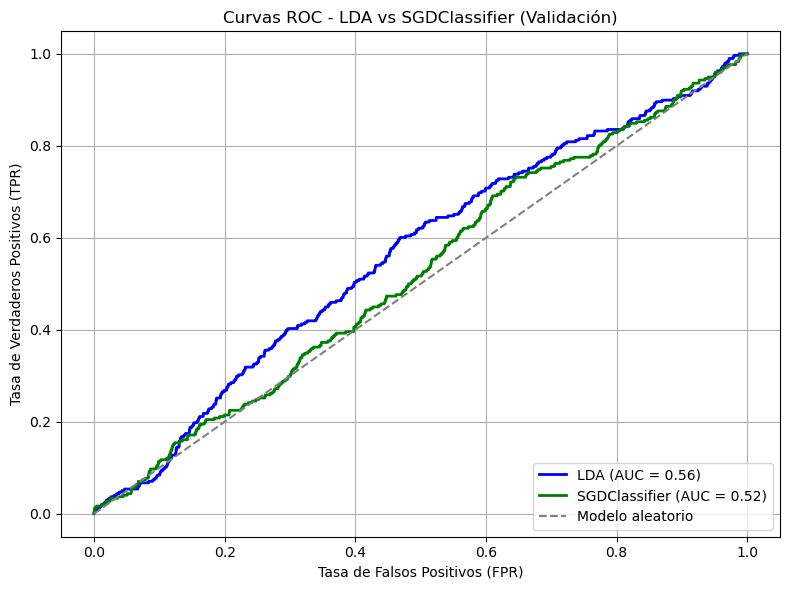

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 1. Modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_probs = lda.predict_proba(x_test)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs, pos_label=1)
auc_lda = auc(fpr_lda, tpr_lda)

# 2. Modelo SGDClassifier (SVM lineal)
sgd = SGDClassifier(loss='hinge', max_iter=1000, class_weight='balanced', random_state=42)
sgd.fit(x_train, y_train)
sgd_scores = sgd.decision_function(x_test)  # No predict_proba, usamos scores
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, sgd_scores, pos_label=1)
auc_sgd = auc(fpr_sgd, tpr_sgd)

# --- Graficar solo LDA y SGD ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, lw=2, label='LDA (AUC = %0.2f)' % auc_lda, color='blue')
plt.plot(fpr_sgd, tpr_sgd, lw=2, label='SGDClassifier (AUC = %0.2f)' % auc_sgd, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Modelo aleatorio')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - LDA vs SGDClassifier (Validación)')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



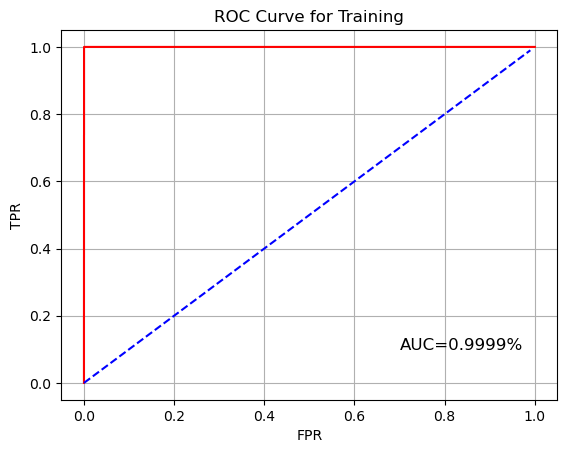

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_train, y_train_probs)
plt.plot(fpr, tpr, color='r')

xb = [i * 0.01 for i in range(100)]
yb = [i * 0.01 for i in range(100)]
plt.plot(xb, yb, linestyle='--', color='b')

plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Training')

auc = str(round(metrics.auc(fpr, tpr), 4))
plt.text(x=0.7, y=0.1, s='AUC=' + auc + '%', size=12)

plt.show()


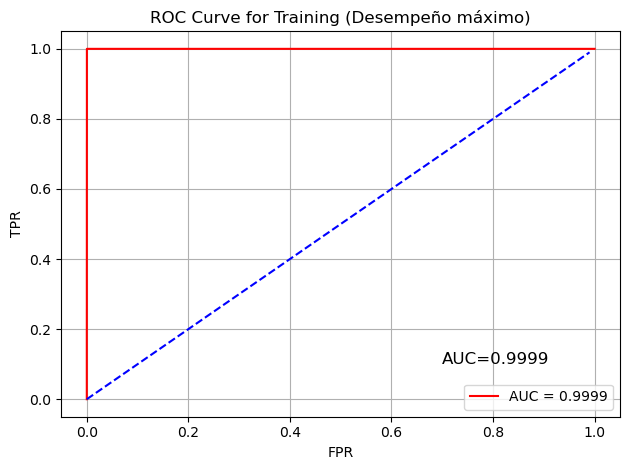

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Calcular la curva ROC directamente con las predicciones originales
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_probs)
auc_value = round(metrics.auc(fpr, tpr), 4)

# Graficar
plt.plot(fpr, tpr, color='r', label=f'AUC = {auc_value}')

# Línea de referencia (modelo sin capacidad predictiva)
xb = [i * 0.01 for i in range(100)]
yb = [i * 0.01 for i in range(100)]
plt.plot(xb, yb, linestyle='--', color='b')

plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Training (Desempeño máximo)')
plt.text(x=0.7, y=0.1, s='AUC=' + str(auc_value), size=12)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [20]:
confusion_matrix(y_test, y_val_pred)

array([[8379,    0],
       [ 295,    3]], dtype=int64)

In [21]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8379
           1       1.00      0.01      0.02       298

    accuracy                           0.97      8677
   macro avg       0.98      0.51      0.50      8677
weighted avg       0.97      0.97      0.95      8677



Text(0.7, 0.1, 'AUC=0.6%')

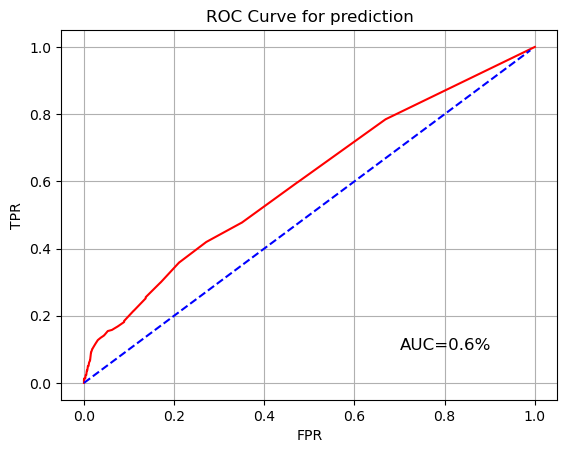

In [22]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

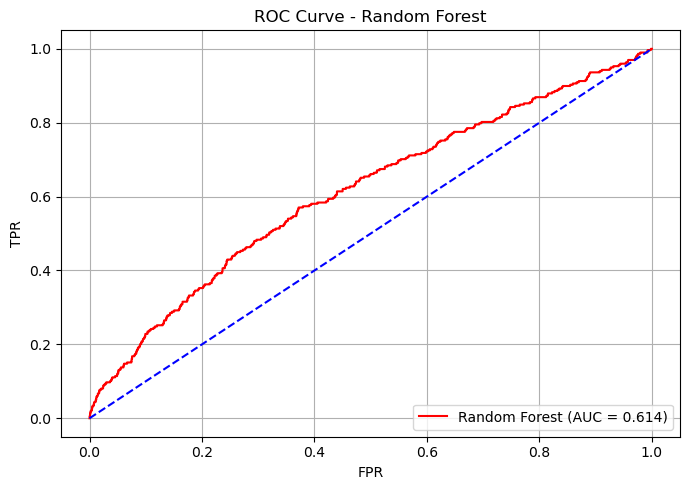

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Entrenar Random Forest con mejoras
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(x_train, y_train)

# Obtener probabilidades para la clase positiva
y_val_probs = rf_model.predict_proba(x_test)[:, 1]

# Calcular curva ROC y AUC
fpr, sensitivity, _ = roc_curve(y_test, y_val_probs)
auc_rf = auc(fpr, sensitivity)

# Graficar curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, sensitivity, color='r', label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
##RED NEURONAL

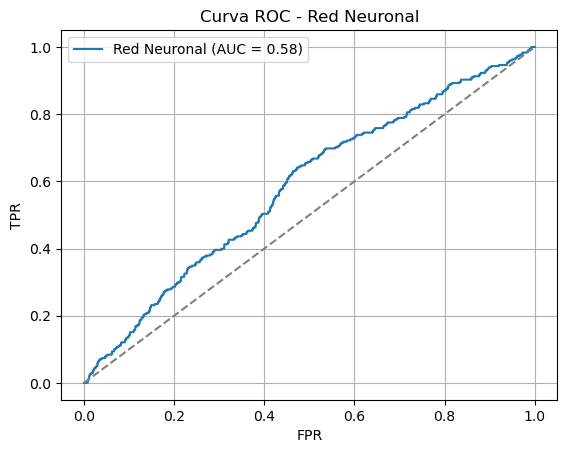

In [26]:
from sklearn.neural_network import MLPClassifier

# Entrenar red neuronal
nn_model = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=500)
nn_model.fit(x_train, y_train)

# Probabilidades
nn_probs = nn_model.predict_proba(x_test)[:, 1]

# ROC
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)
auc_nn = auc(fpr_nn, tpr_nn)

# Plot
plt.figure()
plt.plot(fpr_nn, tpr_nn, label=f'Red Neuronal (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Red Neuronal')
plt.grid(True)
plt.legend()
plt.show()


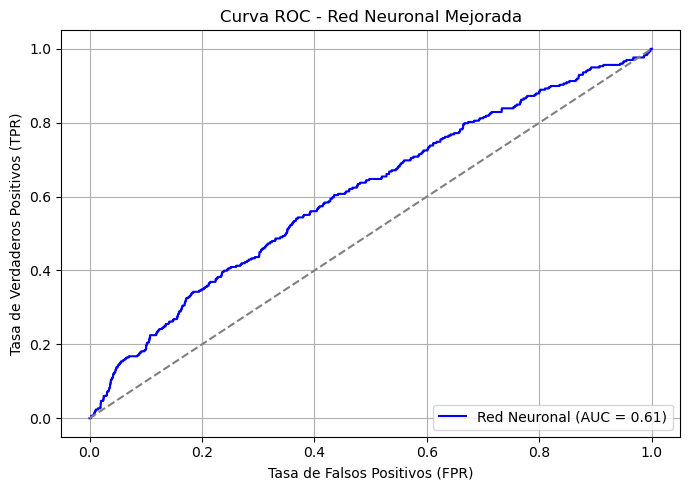

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Crear pipeline con escalado + red neuronal
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(50, 30, 10), alpha=0.001, max_iter=1000, random_state=42))
])

# Entrenar el modelo
pipeline.fit(x_train, y_train)

# Obtener probabilidades del conjunto de prueba
nn_probs = pipeline.predict_proba(x_test)[:, 1]

# Calcular curva ROC y AUC
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)
auc_nn = auc(fpr_nn, tpr_nn)

# Graficar curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr_nn, tpr_nn, label=f'Red Neuronal (AUC = {auc_nn:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Red Neuronal Mejorada')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



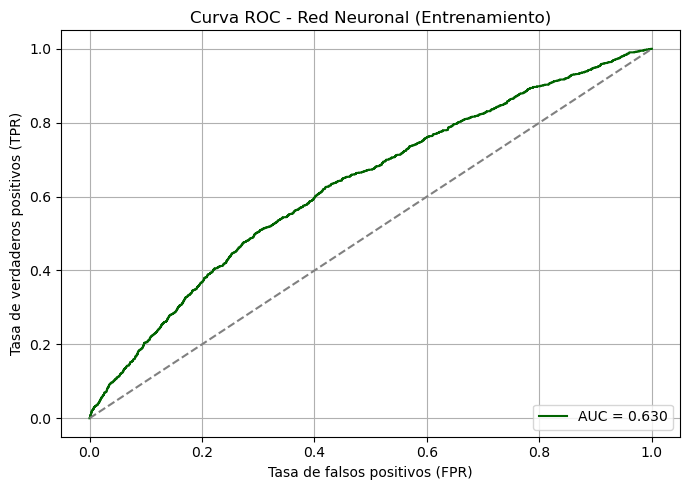

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Pipeline de entrenamiento de la red neuronal
nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(20, 10), alpha=0.001, max_iter=1000, random_state=42))
])

# Entrenar con datos de entrenamiento
nn_pipeline.fit(x_train, y_train)

# Obtener probabilidades del entrenamiento (NO del test)
y_train_probs_nn = nn_pipeline.predict_proba(x_train)[:, 1]

# Calcular curva ROC y AUC del entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs_nn)
auc_train = auc(fpr_train, tpr_train)

# Graficar curva ROC del entrenamiento
plt.figure(figsize=(7, 5))
plt.plot(fpr_train, tpr_train, label=f'AUC = {auc_train:.3f}', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Red Neuronal (Entrenamiento)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


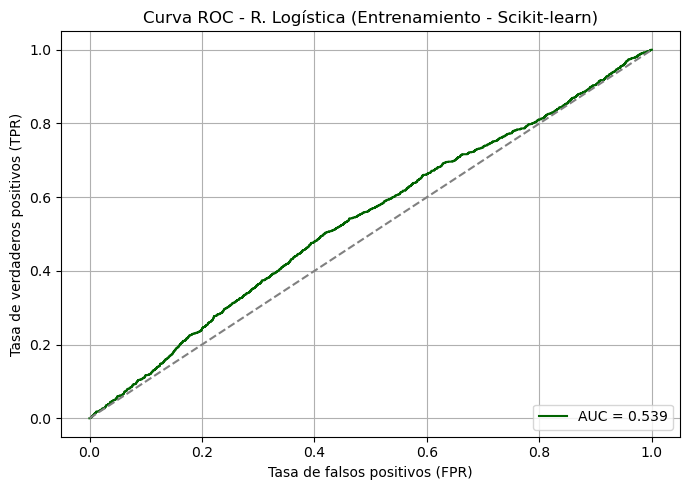

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Seleccionar variables predictoras y variable objetivo del entrenamiento
features = ['pendiente', 'aspecto', 'elevacion', 'curvatura']
X_train_sel = x_train[features]
y_train_sel = y_train

# Crear pipeline con escalado + regresión logística balanceada
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='liblinear',
        penalty='l2',
        class_weight='balanced',
        random_state=42
    ))
])

# Entrenar con el conjunto de entrenamiento
pipeline.fit(X_train_sel, y_train_sel)

# Predecir probabilidades para el mismo conjunto de entrenamiento
y_train_probs = pipeline.predict_proba(X_train_sel)[:, 1]

# Calcular curva ROC y AUC para entrenamiento
fpr, tpr, _ = roc_curve(y_train_sel, y_train_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - R. Logística (Entrenamiento - Scikit-learn)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



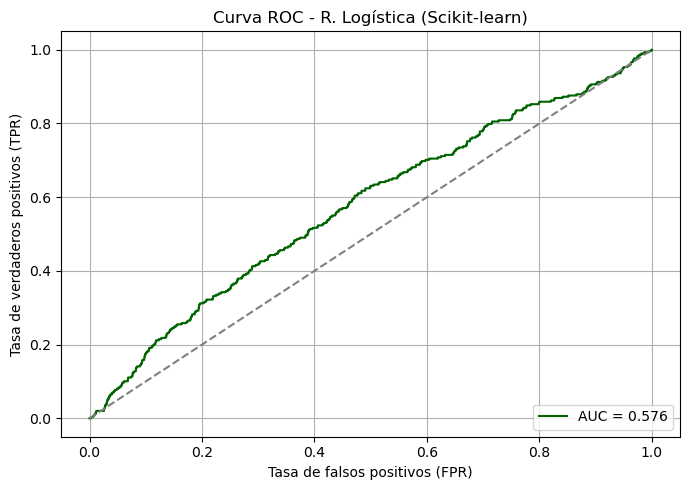

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Seleccionar las variables predictoras y la variable objetivo
features = ['pendiente', 'aspecto', 'elevacion', 'curvatura']
X = x_test[features]  # Si x_test ya contiene todo, de lo contrario usar el dataset completo (X)
y = y_test            # Variable objetivo

# Dividir datos para entrenamiento si lo necesitas, si ya tienes X_train/X_test, puedes omitir esto
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear pipeline con escalado y regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='liblinear',
        penalty='l2',
        class_weight='balanced',
        random_state=42
    ))
])

# Entrenar el modelo
pipeline.fit(X, y)

# Predecir probabilidades (clase positiva)
p = pipeline.predict_proba(X)[:, 1]

# Calcular curva ROC y AUC
fpr, tpr, _ = roc_curve(y, p)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - R. Logística (Scikit-learn)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()




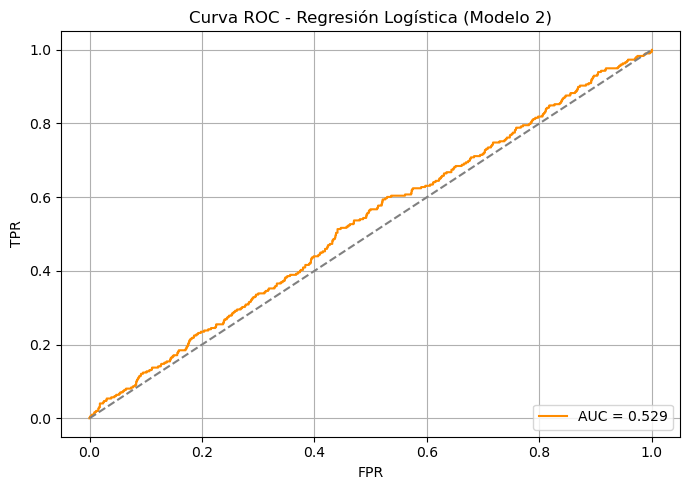

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Coeficientes extraídos de la regresión logística
b0 = -2.9085
b1 = 0.0381    # pendiente
b2 = -0.0004   # aspecto
b3 = -0.0009   # elevación

# Calcular logit y probabilidad
logit = (
    b0 +
    b1 * x_test['pendiente'] +
    b2 * x_test['aspecto'] +
    b3 * x_test['elevacion']
)
p = 1 / (1 + np.exp(-logit))

# Calcular curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, p)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Regresión Logística (Modelo 2)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



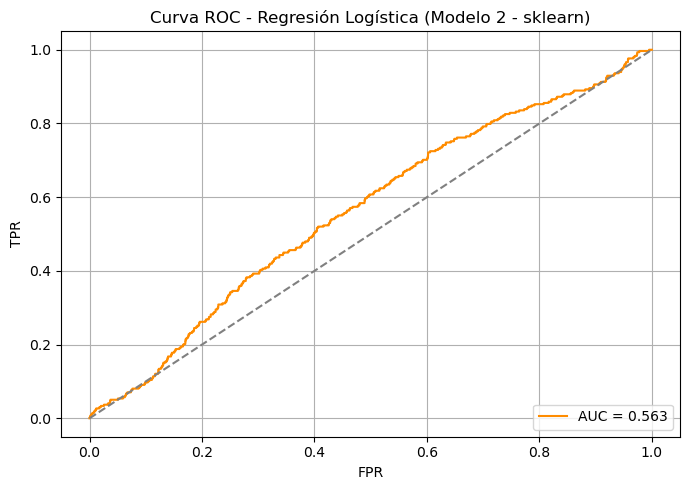

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Nos aseguramos de usar solo las columnas relevantes para este modelo
features = ['pendiente', 'aspecto', 'elevacion']
X_train_sel = x_train[features]
X_test_sel = x_test[features]

# Crear pipeline con escalado y modelo balanceado
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='liblinear',
        penalty='l2',
        class_weight='balanced',
        random_state=42
    ))
])

# Entrenar y predecir
pipeline.fit(X_train_sel, y_train)
y_probs = pipeline.predict_proba(X_test_sel)[:, 1]

# Calcular y graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Regresión Logística (Modelo 2 - sklearn)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()




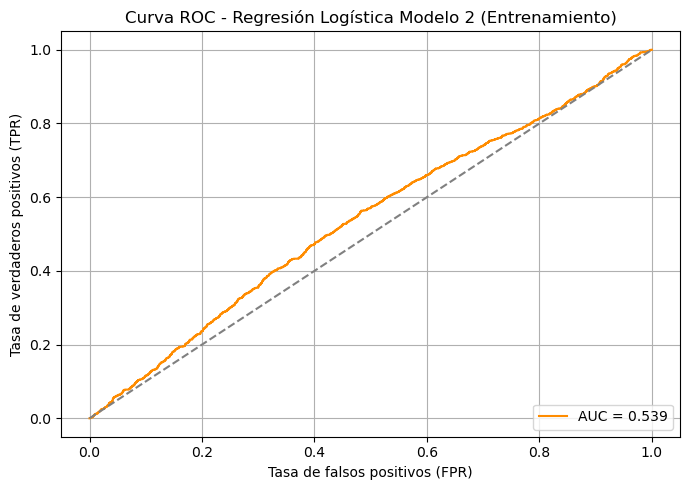

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Usar solo las columnas relevantes para el Modelo 2
features = ['pendiente', 'aspecto', 'elevacion']
X_train_sel = x_train[features]

# Crear pipeline con escalado y regresión logística balanceada
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='liblinear',
        penalty='l2',
        class_weight='balanced',
        random_state=42
    ))
])

# Entrenar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train_sel, y_train)

# Predecir probabilidades en el mismo conjunto de entrenamiento
y_train_probs = pipeline.predict_proba(X_train_sel)[:, 1]

# Calcular curva ROC y AUC para entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Graficar curva ROC del entrenamiento
plt.figure(figsize=(7, 5))
plt.plot(fpr_train, tpr_train, label=f'AUC = {roc_auc_train:.3f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Regresión Logística Modelo 2 (Entrenamiento)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



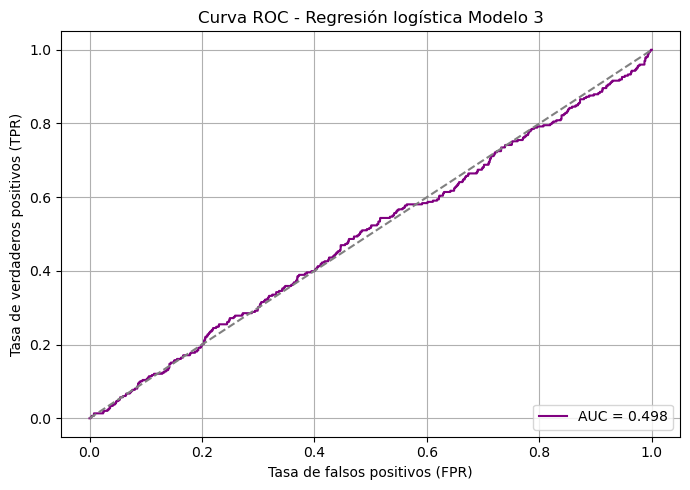

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Coeficientes del modelo 3
b0 = -3.1236
b1 = 0.0392     # pendiente
b2 = -0.00009   # elevacion
b3 = 0.0883     # curvatura

# Calcular logit y probabilidad
logit = (
    b0 +
    b1 * x_test['pendiente'] +
    b2 * x_test['elevacion'] +
    b3 * x_test['curvatura']
)
p = 1 / (1 + np.exp(-logit))

# Calcular curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, p)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Regresión logística Modelo 3')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


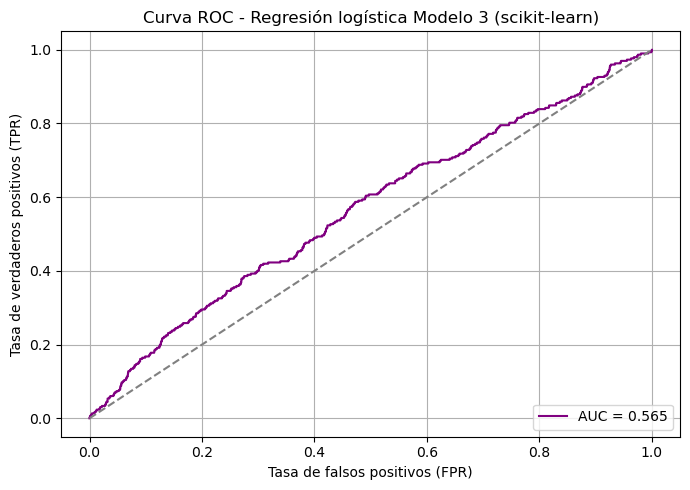

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Seleccionar variables relevantes para el Modelo 3
features = ['pendiente', 'elevacion', 'curvatura']
X_train_sel = x_train[features]
X_test_sel = x_test[features]

# Crear pipeline: escalado + regresión logística balanceada
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='liblinear',
        penalty='l2',
        class_weight='balanced',
        random_state=42
    ))
])

# Entrenar el modelo
pipeline.fit(X_train_sel, y_train)

# Predecir probabilidades sobre el conjunto de prueba
y_probs = pipeline.predict_proba(X_test_sel)[:, 1]

# Calcular curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Regresión logística Modelo 3 (scikit-learn)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



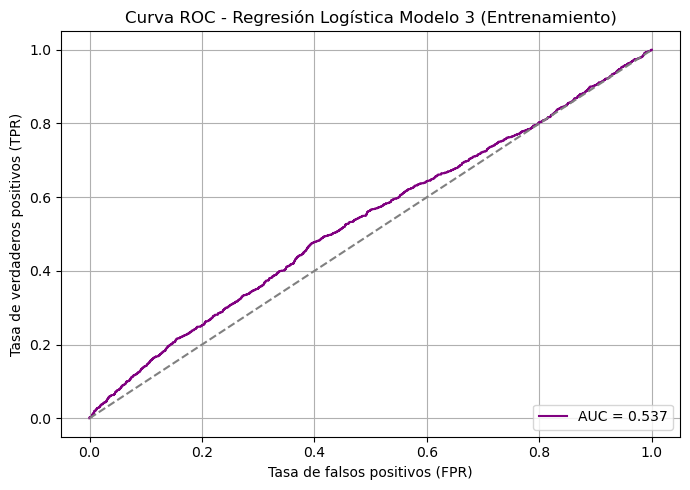

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Seleccionar variables relevantes para el Modelo 3
features = ['pendiente', 'elevacion', 'curvatura']
X_train_sel = x_train[features]

# Crear pipeline: escalado + regresión logística balanceada
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='liblinear',
        penalty='l2',
        class_weight='balanced',
        random_state=42
    ))
])

# Entrenar el modelo sobre los datos de entrenamiento
pipeline.fit(X_train_sel, y_train)

# Predecir probabilidades sobre el mismo conjunto de entrenamiento
y_train_probs = pipeline.predict_proba(X_train_sel)[:, 1]

# Calcular curva ROC y AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Graficar curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr_train, tpr_train, label=f'AUC = {roc_auc_train:.3f}', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Regresión Logística Modelo 3 (Entrenamiento)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



In [38]:
import pandas as pd

# Mostrar tabla resumen
df_auc = pd.DataFrame.from_dict(auc_resultados, orient='index', columns=['AUC'])
df_auc = df_auc.sort_values(by='AUC', ascending=False)
df_auc


,AUC
Modelo 3,0.565329
Modelo 2,0.563108
Modelo 1,0.560415
